1. Create a new notebook.
Test Tensor flow with the below python codes at colab.  



In [ ]:
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model

import matplotlib.pyplot as plt

2. Test Tensor flow with linear regressions

In [ ]:
import numpy as np
#Linear Regression with TensorFlow
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
m, n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data]
X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
XT = tf.transpose(X)

In [ ]:
theta = tf.matmul(tf.matmul(tf.linalg.inv(tf.matmul(XT, X)), XT), y)

print(theta)

tf.Tensor(
[[-3.7144665e+01]
 [ 4.3637392e-01]
 [ 9.3933418e-03]
 [-1.0714764e-01]
 [ 6.4542186e-01]
 [-4.1016874e-06]
 [-3.7816020e-03]
 [-4.2341197e-01]
 [-4.3682083e-01]], shape=(9, 1), dtype=float32)


3. Test Tensor flow with MNIST (handwriting) data set

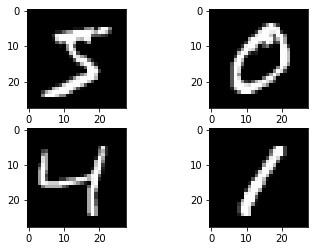

Epoch 1/10
300/300 - 4s - loss: 0.2760 - accuracy: 0.9222 - val_loss: 0.1337 - val_accuracy: 0.9614 - 4s/epoch - 14ms/step
Epoch 2/10
300/300 - 4s - loss: 0.1104 - accuracy: 0.9680 - val_loss: 0.1020 - val_accuracy: 0.9688 - 4s/epoch - 13ms/step
Epoch 3/10
300/300 - 5s - loss: 0.0709 - accuracy: 0.9797 - val_loss: 0.0794 - val_accuracy: 0.9752 - 5s/epoch - 16ms/step
Epoch 4/10
300/300 - 4s - loss: 0.0505 - accuracy: 0.9854 - val_loss: 0.0678 - val_accuracy: 0.9775 - 4s/epoch - 12ms/step
Epoch 5/10
300/300 - 4s - loss: 0.0385 - accuracy: 0.9890 - val_loss: 0.0625 - val_accuracy: 0.9798 - 4s/epoch - 13ms/step
Epoch 6/10
300/300 - 5s - loss: 0.0275 - accuracy: 0.9925 - val_loss: 0.0615 - val_accuracy: 0.9804 - 5s/epoch - 16ms/step
Epoch 7/10
300/300 - 4s - loss: 0.0187 - accuracy: 0.9956 - val_loss: 0.0574 - val_accuracy: 0.9816 - 4s/epoch - 13ms/step
Epoch 8/10
300/300 - 4s - loss: 0.0139 - accuracy: 0.9972 - val_loss: 0.0622 - val_accuracy: 0.9814 - 4s/epoch - 13ms/step
Epoch 9/10
300/3

In [ ]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


# define baseline model
def baseline_model():
# create model
 model = Sequential()
 model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
 model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
# Compile model
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model


# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

4. Derive the gradients for the below expressions:

In [ ]:
#Importing the libraries
import sympy as sp
from sympy.physics.vector import dynamicsymbols as dynamicsymbols

#defining the variables used in the equation
x1, x2 = sp.symbols('x1, x2')
a1, a2, a3, a4 = sp.symbols('a1, a2, a3, a4')

#Creating the matrix
A = sp.Matrix([[a1, a2], [a3, a4]])
x = sp.Matrix([x1, x2])
f = 0.5*x.T@A@x
f
#This will print the function in mathematical representation


Matrix([[x1*(0.5*a1*x1 + 0.5*a3*x2) + x2*(0.5*a2*x1 + 0.5*a4*x2)]])

In [ ]:
#Now solving equations, condition for LHS
#Calculating the gradient of the function df(x)
der_f = sp.diff(f, x)
der_f = sp.Matrix([der_f[0][0][0], der_f[1][0][0]])
der_f

Matrix([
[1.0*a1*x1 + 0.5*a2*x2 + 0.5*a3*x2],
[0.5*a2*x1 + 0.5*a3*x1 + 1.0*a4*x2]])

In [ ]:
#Putting the value of x1, x2 and applying the condition of symmetric matrix condition(a2 = a3)

In [ ]:
der = der_f.subs({x1:2, x2:3, a2:a3})
der

Matrix([
[2.0*a1 + 3.0*a3],
[2.0*a3 + 3.0*a4]])

In [ ]:
#Now working on RHS side

In [ ]:
der_f = A@x

In [ ]:
der_f.subs({x1:2, x2:3, a2:a3})

Matrix([
[2*a1 + 3*a3],
[2*a3 + 3*a4]])

In [ ]:
#Hence LHS = RHS (Proved)